In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [62]:
# 每一列没有标题，用header = None自动加一个
data = pd.read_csv('E:/Python_code/keras_total/日月光华-keras课程资料/小型数据集/credit-a.csv', header = None)

In [63]:
# 前0-14列是特征，第15列是待预测结果：只有-1和1，是个二分类问题
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [64]:
data.iloc[:,-1].unique()

array([-1,  1], dtype=int64)

In [65]:
# keras中既支持pandas的Dateframe数据类型，也支持numpy的ndarray类型；
# 这里展示用ndarray类型：必须是2维的！！！ 即列向量要转为(num,1)的二维数组！
# 可以这样理解二维数组：第一维代表数组总个数，第二维代表长度为1的目标值
x = data.iloc[:,:-1].values  
y = data.iloc[:, -1].replace(-1,0).values # 因为二分类用sigmoid函数的范围是[0,1]，把-1换成0最好
y = y.reshape(-1,1)   # (-1,1) = (653,1) 

In [66]:
x.shape, y.shape

((653, 15), (653, 1))

# 多层网络的搭建：

In [67]:
# 下面模拟“过拟合”：
model = keras.Sequential()

In [68]:
from keras import layers

In [69]:
# 第一层的输入，可以用input_dim，也可以用input_shape
# input_dim = 特征数  即：输入层有15个输入单元
# input_shape = (None, 特征数)  即：还是输入层有15个输入单元的意思
# 因此，一般都用input_dim
model.add( layers.Dense(128, input_dim=15, activation = 'relu' ) )
model.add( layers.Dense(128, activation = 'relu' ) )
model.add( layers.Dense(128, activation = 'relu' ) )
model.add( layers.Dense(1, activation = 'sigmoid') )

In [70]:
model.summary()
# 2048 = 15 * 128 + 128 —— 第一隐藏层的128个神经元，每个获得15个w和1个b
# 16512 = 128 * 128 + 128 —— 第二隐藏层的128个神经元，每个获得128个w和1个b
# 129 = 1 * 128 + 1 —— 输出层的1个神经元，获得128个w和1个b

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               2048      
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile( optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['acc']
)

In [72]:
history = model.fit(x, y, epochs = 1000)


Epoch 1/1000
653/653 [==============================] - 0s 707us/step - loss: 8.7330 - acc: 0.5773
Epoch 2/1000
653/653 [==============================] - 0s 46us/step - loss: 1.7923 - acc: 0.6524
Epoch 3/1000
653/653 [==============================] - 0s 43us/step - loss: 7.9799 - acc: 0.6493
Epoch 4/1000
653/653 [==============================] - 0s 46us/step - loss: 1.9644 - acc: 0.6233
Epoch 5/1000
653/653 [==============================] - 0s 52us/step - loss: 14.0854 - acc: 0.6478
Epoch 6/1000
653/653 [==============================] - 0s 50us/step - loss: 2.7054 - acc: 0.6279
Epoch 7/1000
653/653 [==============================] - 0s 50us/step - loss: 1.2834 - acc: 0.6662
Epoch 8/1000
653/653 [==============================] - 0s 49us/step - loss: 1.7468 - acc: 0.6616
Epoch 9/1000
653/653 [==============================] - 0s 43us/step - loss: 1.2044 - acc: 0.6815
Epoch 10/1000
653/653 [==============================] - 0s 46us/step - loss: 0.8287 - acc: 0.6983
Epoch 11/1000
65

653/653 [==============================] - 0s 44us/step - loss: 0.3201 - acc: 0.8729
Epoch 82/1000
653/653 [==============================] - 0s 41us/step - loss: 0.3132 - acc: 0.8683
Epoch 83/1000
653/653 [==============================] - 0s 38us/step - loss: 0.3191 - acc: 0.8606
Epoch 84/1000
653/653 [==============================] - 0s 37us/step - loss: 0.2866 - acc: 0.8928
Epoch 85/1000
653/653 [==============================] - 0s 38us/step - loss: 0.3604 - acc: 0.8714
Epoch 86/1000
653/653 [==============================] - 0s 35us/step - loss: 0.3408 - acc: 0.8469
Epoch 87/1000
653/653 [==============================] - 0s 38us/step - loss: 0.3325 - acc: 0.8637
Epoch 88/1000
653/653 [==============================] - 0s 38us/step - loss: 0.3492 - acc: 0.8560
Epoch 89/1000
653/653 [==============================] - 0s 37us/step - loss: 0.3092 - acc: 0.8729
Epoch 90/1000
653/653 [==============================] - 0s 37us/step - loss: 0.3059 - acc: 0.8668
Epoch 91/1000
653/653 [=

653/653 [==============================] - 0s 38us/step - loss: 0.2628 - acc: 0.8928
Epoch 164/1000
653/653 [==============================] - 0s 35us/step - loss: 0.2710 - acc: 0.8928
Epoch 165/1000
653/653 [==============================] - 0s 37us/step - loss: 0.2671 - acc: 0.9005
Epoch 166/1000
653/653 [==============================] - 0s 35us/step - loss: 0.6622 - acc: 0.8683
Epoch 167/1000
653/653 [==============================] - 0s 37us/step - loss: 0.5282 - acc: 0.7994
Epoch 168/1000
653/653 [==============================] - 0s 37us/step - loss: 0.3748 - acc: 0.8407
Epoch 169/1000
653/653 [==============================] - 0s 35us/step - loss: 0.5316 - acc: 0.8606
Epoch 170/1000
653/653 [==============================] - 0s 37us/step - loss: 0.4692 - acc: 0.8744
Epoch 171/1000
653/653 [==============================] - 0s 35us/step - loss: 0.2550 - acc: 0.8959
Epoch 172/1000
653/653 [==============================] - 0s 38us/step - loss: 0.2682 - acc: 0.8897
Epoch 173/1000


653/653 [==============================] - 0s 38us/step - loss: 0.2045 - acc: 0.9173
Epoch 246/1000
653/653 [==============================] - 0s 40us/step - loss: 0.1977 - acc: 0.9280
Epoch 247/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1966 - acc: 0.9250
Epoch 248/1000
653/653 [==============================] - 0s 35us/step - loss: 0.2093 - acc: 0.9173
Epoch 249/1000
653/653 [==============================] - 0s 37us/step - loss: 0.3163 - acc: 0.8606
Epoch 250/1000
653/653 [==============================] - 0s 35us/step - loss: 0.4942 - acc: 0.8637
Epoch 251/1000
653/653 [==============================] - 0s 37us/step - loss: 0.6981 - acc: 0.8009
Epoch 252/1000
653/653 [==============================] - 0s 35us/step - loss: 1.3185 - acc: 0.8086
Epoch 253/1000
653/653 [==============================] - 0s 38us/step - loss: 1.0080 - acc: 0.8009
Epoch 254/1000
653/653 [==============================] - 0s 35us/step - loss: 0.6323 - acc: 0.8346
Epoch 255/1000


653/653 [==============================] - 0s 38us/step - loss: 0.3141 - acc: 0.8744
Epoch 327/1000
653/653 [==============================] - 0s 38us/step - loss: 0.3562 - acc: 0.8882
Epoch 328/1000
653/653 [==============================] - 0s 38us/step - loss: 0.2524 - acc: 0.8989
Epoch 329/1000
653/653 [==============================] - 0s 37us/step - loss: 0.6150 - acc: 0.8943
Epoch 330/1000
653/653 [==============================] - 0s 37us/step - loss: 0.2571 - acc: 0.8806
Epoch 331/1000
653/653 [==============================] - 0s 37us/step - loss: 0.2373 - acc: 0.8913
Epoch 332/1000
653/653 [==============================] - 0s 35us/step - loss: 0.2299 - acc: 0.9066
Epoch 333/1000
653/653 [==============================] - 0s 40us/step - loss: 0.2303 - acc: 0.9035
Epoch 334/1000
653/653 [==============================] - 0s 34us/step - loss: 0.2285 - acc: 0.9051
Epoch 335/1000
653/653 [==============================] - 0s 37us/step - loss: 0.2384 - acc: 0.9020
Epoch 336/1000


653/653 [==============================] - 0s 37us/step - loss: 0.1284 - acc: 0.9571
Epoch 409/1000
653/653 [==============================] - 0s 37us/step - loss: 0.2469 - acc: 0.9112
Epoch 410/1000
653/653 [==============================] - 0s 38us/step - loss: 1.1206 - acc: 0.8836
Epoch 411/1000
653/653 [==============================] - 0s 35us/step - loss: 0.8416 - acc: 0.8714
Epoch 412/1000
653/653 [==============================] - 0s 38us/step - loss: 1.9509 - acc: 0.8469
Epoch 413/1000
653/653 [==============================] - 0s 40us/step - loss: 0.5287 - acc: 0.8530
Epoch 414/1000
653/653 [==============================] - 0s 40us/step - loss: 0.3724 - acc: 0.8928
Epoch 415/1000
653/653 [==============================] - 0s 38us/step - loss: 0.3087 - acc: 0.8943
Epoch 416/1000
653/653 [==============================] - 0s 40us/step - loss: 0.2193 - acc: 0.9204
Epoch 417/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1694 - acc: 0.9372
Epoch 418/1000


653/653 [==============================] - 0s 38us/step - loss: 0.2979 - acc: 0.9342
Epoch 490/1000
653/653 [==============================] - 0s 40us/step - loss: 0.2545 - acc: 0.9188
Epoch 491/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1356 - acc: 0.9571
Epoch 492/1000
653/653 [==============================] - 0s 37us/step - loss: 0.2165 - acc: 0.9158
Epoch 493/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1122 - acc: 0.9694
Epoch 494/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1103 - acc: 0.9571
Epoch 495/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1195 - acc: 0.9571
Epoch 496/1000
653/653 [==============================] - 0s 38us/step - loss: 0.1209 - acc: 0.9648
Epoch 497/1000
653/653 [==============================] - 0s 34us/step - loss: 0.2021 - acc: 0.9311
Epoch 498/1000
653/653 [==============================] - 0s 37us/step - loss: 0.2063 - acc: 0.9449
Epoch 499/1000


653/653 [==============================] - 0s 37us/step - loss: 0.1107 - acc: 0.9571
Epoch 572/1000
653/653 [==============================] - 0s 38us/step - loss: 0.1270 - acc: 0.9479
Epoch 573/1000
653/653 [==============================] - 0s 37us/step - loss: 0.0905 - acc: 0.9678
Epoch 574/1000
653/653 [==============================] - 0s 37us/step - loss: 0.0857 - acc: 0.9663
Epoch 575/1000
653/653 [==============================] - 0s 35us/step - loss: 0.0705 - acc: 0.9770
Epoch 576/1000
653/653 [==============================] - 0s 35us/step - loss: 0.0953 - acc: 0.9694
Epoch 577/1000
653/653 [==============================] - 0s 38us/step - loss: 0.0972 - acc: 0.9678
Epoch 578/1000
653/653 [==============================] - 0s 35us/step - loss: 0.0823 - acc: 0.9709
Epoch 579/1000
653/653 [==============================] - 0s 38us/step - loss: 0.1112 - acc: 0.9602
Epoch 580/1000
653/653 [==============================] - 0s 35us/step - loss: 0.2276 - acc: 0.9188
Epoch 581/1000


653/653 [==============================] - 0s 38us/step - loss: 0.4579 - acc: 0.9127
Epoch 654/1000
653/653 [==============================] - 0s 40us/step - loss: 0.4110 - acc: 0.9403
Epoch 655/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1539 - acc: 0.9556
Epoch 656/1000
653/653 [==============================] - 0s 37us/step - loss: 0.2060 - acc: 0.9724
Epoch 657/1000
653/653 [==============================] - 0s 40us/step - loss: 0.2325 - acc: 0.9678
Epoch 658/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1113 - acc: 0.9694
Epoch 659/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1112 - acc: 0.9694
Epoch 660/1000
653/653 [==============================] - 0s 37us/step - loss: 0.0816 - acc: 0.9724
Epoch 661/1000
653/653 [==============================] - 0s 38us/step - loss: 0.0563 - acc: 0.9816
Epoch 662/1000
653/653 [==============================] - 0s 37us/step - loss: 0.0546 - acc: 0.9862
Epoch 663/1000


653/653 [==============================] - 0s 41us/step - loss: 0.1558 - acc: 0.9495
Epoch 736/1000
653/653 [==============================] - 0s 40us/step - loss: 0.1579 - acc: 0.9296
Epoch 737/1000
653/653 [==============================] - 0s 41us/step - loss: 0.1324 - acc: 0.9541
Epoch 738/1000
653/653 [==============================] - 0s 41us/step - loss: 0.1124 - acc: 0.9571
Epoch 739/1000
653/653 [==============================] - 0s 40us/step - loss: 0.1025 - acc: 0.9571
Epoch 740/1000
653/653 [==============================] - 0s 38us/step - loss: 0.1004 - acc: 0.9541
Epoch 741/1000
653/653 [==============================] - 0s 40us/step - loss: 0.1058 - acc: 0.9663
Epoch 742/1000
653/653 [==============================] - 0s 37us/step - loss: 0.0889 - acc: 0.9709
Epoch 743/1000
653/653 [==============================] - 0s 40us/step - loss: 0.0765 - acc: 0.9694
Epoch 744/1000
653/653 [==============================] - 0s 40us/step - loss: 0.0652 - acc: 0.9770
Epoch 745/1000


653/653 [==============================] - 0s 41us/step - loss: 0.0429 - acc: 0.9862
Epoch 818/1000
653/653 [==============================] - 0s 38us/step - loss: 0.0287 - acc: 0.9862
Epoch 819/1000
653/653 [==============================] - 0s 38us/step - loss: 0.0335 - acc: 0.9862
Epoch 820/1000
653/653 [==============================] - 0s 37us/step - loss: 0.0285 - acc: 0.9908
Epoch 821/1000
653/653 [==============================] - 0s 37us/step - loss: 0.2538 - acc: 0.9403
Epoch 822/1000
653/653 [==============================] - 0s 41us/step - loss: 0.3301 - acc: 0.9311
Epoch 823/1000
653/653 [==============================] - 0s 41us/step - loss: 0.1607 - acc: 0.9617
Epoch 824/1000
653/653 [==============================] - 0s 40us/step - loss: 0.0713 - acc: 0.9724
Epoch 825/1000
653/653 [==============================] - 0s 38us/step - loss: 0.0715 - acc: 0.9770
Epoch 826/1000
653/653 [==============================] - 0s 37us/step - loss: 0.0559 - acc: 0.9770
Epoch 827/1000


653/653 [==============================] - 0s 40us/step - loss: 0.0422 - acc: 0.9862
Epoch 900/1000
653/653 [==============================] - 0s 38us/step - loss: 0.0555 - acc: 0.9801
Epoch 901/1000
653/653 [==============================] - 0s 38us/step - loss: 0.1245 - acc: 0.9617
Epoch 902/1000
653/653 [==============================] - 0s 38us/step - loss: 0.1194 - acc: 0.9556
Epoch 903/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1995 - acc: 0.9648
Epoch 904/1000
653/653 [==============================] - 0s 40us/step - loss: 0.2051 - acc: 0.9342
Epoch 905/1000
653/653 [==============================] - 0s 37us/step - loss: 0.8593 - acc: 0.9081
Epoch 906/1000
653/653 [==============================] - 0s 38us/step - loss: 2.4864 - acc: 0.9387
Epoch 907/1000
653/653 [==============================] - 0s 38us/step - loss: 1.9551 - acc: 0.9158
Epoch 908/1000
653/653 [==============================] - 0s 37us/step - loss: 0.6642 - acc: 0.9096
Epoch 909/1000


653/653 [==============================] - 0s 37us/step - loss: 0.0885 - acc: 0.9663
Epoch 982/1000
653/653 [==============================] - 0s 38us/step - loss: 0.1841 - acc: 0.9449
Epoch 983/1000
653/653 [==============================] - 0s 40us/step - loss: 0.1957 - acc: 0.9403
Epoch 984/1000
653/653 [==============================] - 0s 38us/step - loss: 0.1041 - acc: 0.9556
Epoch 985/1000
653/653 [==============================] - 0s 37us/step - loss: 0.0864 - acc: 0.9694
Epoch 986/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1188 - acc: 0.9571
Epoch 987/1000
653/653 [==============================] - 0s 38us/step - loss: 0.0883 - acc: 0.9786
Epoch 988/1000
653/653 [==============================] - 0s 35us/step - loss: 0.0787 - acc: 0.9740
Epoch 989/1000
653/653 [==============================] - 0s 37us/step - loss: 0.1341 - acc: 0.9449
Epoch 990/1000
653/653 [==============================] - 0s 38us/step - loss: 0.0609 - acc: 0.9786
Epoch 991/1000


In [77]:
history.history.keys(), type(history.epoch)

(dict_keys(['loss', 'acc']), list)

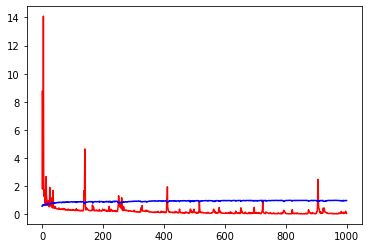

In [78]:
plt.plot( history.epoch, history.history.get('loss'), c = 'r' )
plt.plot( history.epoch, history.history.get('acc'), c = 'b')

In [ ]:
# 是否过拟合，不是看对原数据的拟合/学习能力，看的是对“新数据”的泛化能力！！
# 一维的增大网络，增多每层的神经元，可以无上限的提升对训练数据的拟合/h回归/预测能力，但是对从未见过的新数据，可能很差！

# 对一个网络好坏的评价标准：用训练好的网络测试“未见过数据”的准确率！